<center> <b> Aclaración <br> </center> </b>
Algunos, si no muchos de los nombres de las variables son repetidos
a lo largo del notebook, por lo que es necesario correr el notebook
en orden.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import lognorm, norm
import datetime

<center> <b> Running Data Analysis

Lectura de datos

In [2]:
run_data = pd.read_csv('RunningData.csv')
run_data.head(5)

,Date,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
0,11/11/2018 14:05,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,NaN,10.44,58:40:00,5:37,10.68,774.0,130,159.0,NaN,NaN,2018-11-11-140512.gpx
1,11/9/2018 15:02,be65818d-a801-4847-a43b-2acdf4dc70e7,Running,NaN,12.84,1:14:12,5:47,10.39,954.0,168,159.0,NaN,NaN,2018-11-09-150235.gpx
2,11/4/2018 16:05,c09b2f92-f855-497c-b624-c196b3ef036c,Running,NaN,13.01,1:15:16,5:47,10.37,967.0,171,155.0,NaN,NaN,2018-11-04-160500.gpx
3,11/1/2018 14:03,bc9b612d-3499-43ff-b82a-9b17b71b8a36,Running,NaN,12.98,1:14:25,5:44,10.47,960.0,169,158.0,NaN,NaN,2018-11-01-140358.gpx
4,10/27/2018 17:01,972567b2-1b0e-437c-9e82-fef8078d6438,Running,NaN,13.02,1:12:50,5:36,10.73,967.0,170,154.0,NaN,NaN,2018-10-27-170136.gpx


A continuación, vamos a hacer un análisis sobre la variable de interes,
en este caso, la distancia. <br>
Veremos el histograma con cantidades de intervalos diferentes.

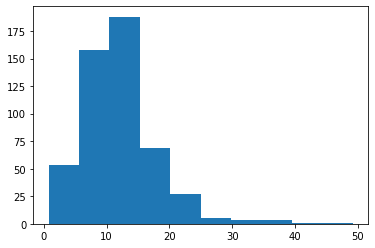

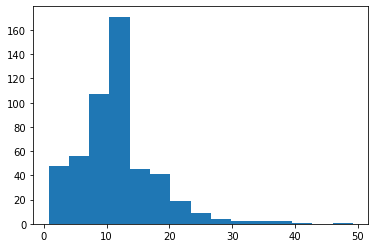

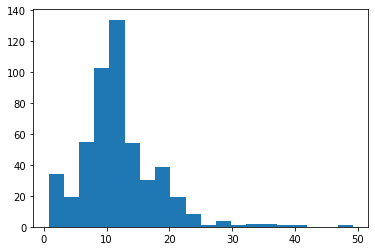

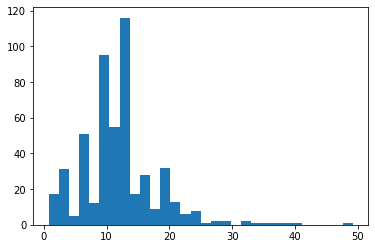

In [3]:
plt.hist(run_data['Distance (km)'], bins=10)
plt.show()

plt.hist(run_data['Distance (km)'], bins=15)
plt.show()

plt.hist(run_data['Distance (km)'], bins=20)
plt.show()

plt.hist(run_data['Distance (km)'], bins=30)
plt.show()

Se puede apreciar que a partir de 20 intervalos para graficar,
se comienza a perder la continuidad de la gráfica, por lo que el
analisis de distribución lo haremos sobre bins = 15

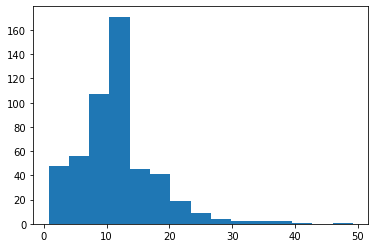

In [4]:
plt.hist(run_data['Distance (km)'], bins=15)
plt.show()

En este histograma se puede apreciar como la variable se comporta
como una normal con un sesgo a la izquierda. Existe una distribución
llamada log-normal en la que se presenta este comportamiento.
<br>
A continuación veremos un ejemplo de la log-normal con mu = 0 y sigma = 0.5

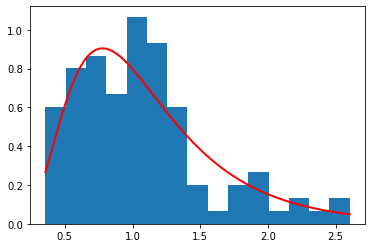

In [5]:
mu, sigma = 0., .5
s = np.random.lognormal(mu, sigma, 100)

count, bins, ignored = plt.hist(s, 15, density=True, align='mid')

x = np.linspace(min(bins), max(bins), 10000)
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))
       / (x * sigma * np.sqrt(2 * np.pi)))

plt.plot(x, pdf, linewidth=2, color='r')
plt.axis('tight')
plt.show()

Sería interesante ver cómo se comporta la log normal utilizando los
valores de mu y sigma que tenemos en nuestra variable distancia <br>
<br>
Primero es necesario aplicar el logaritmo natural sobre la distancia
para encontrar los valores correspondientes de mu y sigma.

In [6]:
run_data['log_dist'] = np.log(run_data['Distance (km)'])

mu = run_data['log_dist'].mean()
sigma = run_data['log_dist'].std()
print(len(run_data.index))

508


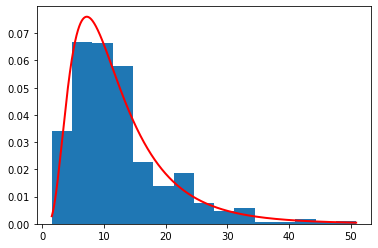

In [7]:
samples = len(run_data.index)
s = np.random.lognormal(mu, sigma, samples)

count, bins, ignored = plt.hist(s, 15, density=True, align='mid')

x = np.linspace(min(bins), max(bins), 10000)
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))
       / (x * sigma * np.sqrt(2 * np.pi)))

plt.plot(x, pdf, linewidth=2, color='r')
plt.axis('tight')
plt.show()

Teniendo ya la distribución asociada a nuestra variable de interes
podemos hacer uso de las funciones pdf y cdf que provee la libreria
scipy

In [8]:
#calcular la probabilidad de que la distancia sea 10
lognorm(mu, sigma).pdf(10)

0.011478130903112244

In [9]:
#calcular la probabilidad de que la distancia sea > 15
1 - lognorm(mu, sigma).cdf(15)

0.1273279186818408

Nótese que la manera más fácil de sacar la probablidad de que la
distancia sea mayor a 15 es sacar el complemento y hacer 1 - el
complemento (en este caso la funcion acumulativa de probabilidad para
x = 15)

Para sacar el valor observado haremos un histograma para comprarar
la distribución de los datos entre s (generado utilizando
_np.random.lognormal_) y los valores reales.

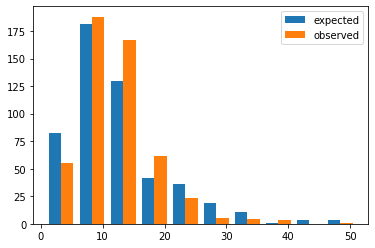

In [10]:
expected = pd.DataFrame(data=s[0:],    # values   # 1st column as index
              columns=['distance'])
expected['mark'] = 1

observed = pd.DataFrame()
observed['distance'] = run_data['Distance (km)'].astype('float')
observed['mark'] = 2

eodf = pd.concat([expected, observed])
plt.hist((expected['distance'], observed['distance']),
         bins=10,
         label=('expected', 'observed'))
plt.legend()
plt.show()

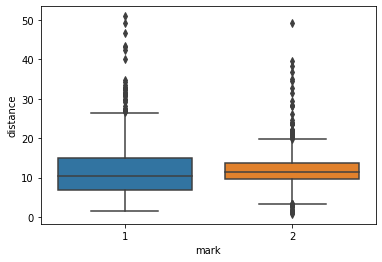

In [11]:
sns.boxplot(x='mark', y='distance', data=eodf)
plt.show()

Se puede apreciar que, si bien la distribución es muy parecida, la media
de los datos observados está un poco más a la derecha y su desviación
estándar es mucho más baja. Sin embargo, la distribución log-normal se
asemeja mucho a la distribución de estos datos.

<center> <b> Vehicle Accident Analysis

In [12]:
veh_data = pd.read_excel('Accidentalidad_en_Barranquilla.xls')
veh_data.head(10)

,FECHA_ACCIDENTE,AÑO_ACCIDENTE,MES_ACCIDENTE,DIA_ACCIDENTE,HORA_ACCIDENTE,GRAVEDAD_ACCIDENTE,CLASE_ACCIDENTE,SITIO_EXACTO_ACCIDENTE,CANT_HERIDOS_EN _SITIO_ACCIDENTE,CANT_MUERTOS_EN _SITIO_ACCIDENTE,CANTIDAD_ACCIDENTES
0,2015-01-01,2015,1,Jue,02:10:00:PM,Con heridos,Choque,VIA 40 CON 77,1.0,NaN,1
1,2015-01-01,2015,1,Jue,02:15:00:PM,Solo daños,Choque,CALLE 14 CR 13,NaN,NaN,1
2,2015-01-01,2015,1,Jue,02:20:00:PM,Solo daños,Choque,CL 74 CR 38C,NaN,NaN,1
3,2015-01-01,2015,1,Jue,03:30:00:PM,Con heridos,Choque,CL 45 CR 19,2.0,NaN,1
4,2015-01-01,2015,1,Jue,04:20:00:AM,Solo daños,Choque,CRA 15 CLLE 21,NaN,NaN,1
5,2015-01-01,2015,1,Jue,04:40:00:PM,Con heridos,Choque,CRA 14 CLLE 35,2.0,NaN,1
6,2015-01-01,2015,1,Jue,04:50:00:PM,Con heridos,Atropello,CRA 6 CLLE 90,1.0,NaN,1
7,2015-01-01,2015,1,Jue,06:00:00:AM,Solo daños,Choque,CRA 6 CLLE 92,NaN,NaN,1
8,2015-01-01,2015,1,Jue,07:50:00:PM,Solo daños,Choque,CALLE 99 CR 56,NaN,NaN,1
9,2015-01-01,2015,1,Jue,09:25:00:PM,Solo daños,Choque,CL 47 CR 24,NaN,NaN,1


Agrupar datos por fecha para obtener accidentes diarios

In [13]:
veh_diario = veh_data.groupby(['FECHA_ACCIDENTE'])['CANTIDAD_ACCIDENTES'].sum().reset_index()
veh_diario.head(10)

,FECHA_ACCIDENTE,CANTIDAD_ACCIDENTES
0,2015-01-01,10
1,2015-01-02,13
2,2015-01-03,11
3,2015-01-04,7
4,2015-01-05,14
5,2015-01-06,12
6,2015-01-07,16
7,2015-01-08,14
8,2015-01-09,12
9,2015-01-10,15


Una vez tenemos el dataset agrupado por día, estamos en capacidad de analizar
la distribución de esta variable.

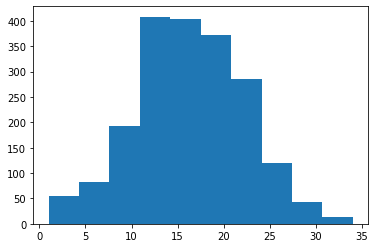

In [14]:
plt.hist(veh_diario['CANTIDAD_ACCIDENTES'])
plt.show()

Grafiquemos entonces una distribución normal y comparémosla con esta
distribución

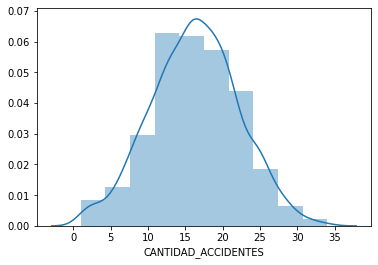

In [15]:
sns.distplot(veh_diario['CANTIDAD_ACCIDENTES'], bins=10)
plt.show()

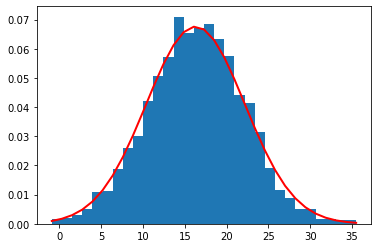

In [16]:
# calcular media y desviación para los parametros de la normal
mu = veh_diario['CANTIDAD_ACCIDENTES'].mean()
sigma = veh_diario['CANTIDAD_ACCIDENTES'].std()
samples = len(veh_diario.index)

s = np.random.normal(mu, sigma, samples)

count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

Comparando las dos gráficas y con mucha más seguridad que en el
ejercicio anterior, podemos decir que la variable de accidentes
por día se ajusta a una distribución normal.
<br>
<br>
Para hallar la probabilidad de que se den menos de 10 y más de 15
accidentes, utilizaremos la función de probabilidad acumulada.
<br>
<br>
<center> Probabilidad de que haya menos de 10 accidentes:

In [17]:
norm(mu, sigma).cdf(10)

0.14387955715179185

<center> Probabilidad de que haya más de 15 accidentes:
<br>

In [18]:
1 - norm(mu, sigma).cdf(15)

0.5854294789326702

Nuevamente utilizamos el complemento pues la función acumulativa
barre probabilidades de menor a mayor valor, por lo que no es
posible sacarla directamente.
<br>
<br>
A continuación revisaremos el valor observado vs el esperado para
ver que tanto se ajusta a una normal.

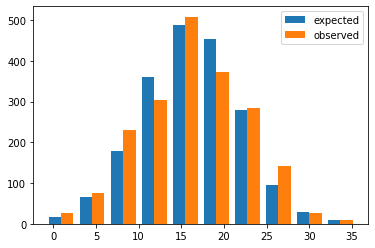

In [19]:
expected = pd.DataFrame(data=s[0:],    # values   # 1st column as index
              columns=['accidents'])

observed = pd.DataFrame()
observed['accidents'] = veh_diario['CANTIDAD_ACCIDENTES'].astype('int')

eodf = pd.concat([expected, observed])
plt.hist((expected['accidents'], observed['accidents']),
         bins=10,
         label=('expected', 'observed'))
plt.legend()
plt.show()

Podemos observar que la distribución se asemeja bastante a una
distribución normal con media = 16.27 y desviación = 5.901

<center> Punto # 2 </center>
La situación planteada directamente lleva a pensar en la distribución
Poisson, pues lo que interesa es, dado una media de ocurrencia (en este
caso la cantidad de accidentes cada 2 horas), saber que tan probale es
que ocurran x eventos.


In [20]:
# extraer la hora para filtrar
veh_data['hour'] = veh_data.apply(
    lambda x: datetime.datetime.strptime(x['HORA_ACCIDENTE'], '%I:%M:%S:%p').time().hour, axis=1)


# filtrar que la hora esté en el intervalo semicerrado [6AM, 6PM)
veh_data_filtered = veh_data[veh_data['hour'].apply(lambda v: 6 <= v < 18)]
veh_data_filtered.head(10)

,FECHA_ACCIDENTE,AÑO_ACCIDENTE,MES_ACCIDENTE,DIA_ACCIDENTE,HORA_ACCIDENTE,GRAVEDAD_ACCIDENTE,CLASE_ACCIDENTE,SITIO_EXACTO_ACCIDENTE,CANT_HERIDOS_EN _SITIO_ACCIDENTE,CANT_MUERTOS_EN _SITIO_ACCIDENTE,CANTIDAD_ACCIDENTES,hour
0,2015-01-01,2015,1,Jue,02:10:00:PM,Con heridos,Choque,VIA 40 CON 77,1.0,NaN,1,14
1,2015-01-01,2015,1,Jue,02:15:00:PM,Solo daños,Choque,CALLE 14 CR 13,NaN,NaN,1,14
2,2015-01-01,2015,1,Jue,02:20:00:PM,Solo daños,Choque,CL 74 CR 38C,NaN,NaN,1,14
3,2015-01-01,2015,1,Jue,03:30:00:PM,Con heridos,Choque,CL 45 CR 19,2.0,NaN,1,15
5,2015-01-01,2015,1,Jue,04:40:00:PM,Con heridos,Choque,CRA 14 CLLE 35,2.0,NaN,1,16
6,2015-01-01,2015,1,Jue,04:50:00:PM,Con heridos,Atropello,CRA 6 CLLE 90,1.0,NaN,1,16
7,2015-01-01,2015,1,Jue,06:00:00:AM,Solo daños,Choque,CRA 6 CLLE 92,NaN,NaN,1,6
10,2015-01-02,2015,1,Vie,01:00:00:PM,Solo daños,Choque,CLLE 64 CRA 44,NaN,NaN,1,13
11,2015-01-02,2015,1,Vie,03:10:00:PM,Solo daños,Choque,CALLE 110 CR 51B,NaN,NaN,1,15
12,2015-01-02,2015,1,Vie,04:00:00:PM,Solo daños,Choque,CL 80 CR 42H,NaN,NaN,1,16


Agrupar por día con el conjunto filtrado

In [21]:
veh_diario_filtered = veh_data_filtered.groupby(['FECHA_ACCIDENTE'])['CANTIDAD_ACCIDENTES'].sum().reset_index()
veh_diario_filtered.head(10)

,FECHA_ACCIDENTE,CANTIDAD_ACCIDENTES
0,2015-01-01,7
1,2015-01-02,10
2,2015-01-03,8
3,2015-01-04,3
4,2015-01-05,13
5,2015-01-06,10
6,2015-01-07,14
7,2015-01-08,10
8,2015-01-09,9
9,2015-01-10,13


Podemos asumir que la cantidad de accidentes que se producen cada 2
horas es la media de este conjunto dividida entre 12 <br>
ya que la mayoría de los accidentes se concentran en estas horas
esto se puede comprobar ya que excluyendo 12 horas la media de
accidentes sólo disminuyó en 4

In [22]:
poisson_lambda = veh_diario_filtered['CANTIDAD_ACCIDENTES'].mean()/6

Tenemos entonces nuestro valor esperado <br>
\\[ \lambda = 2.008 \\] <br>
Procedemos a graficar la distribución derivada por ese lambda.

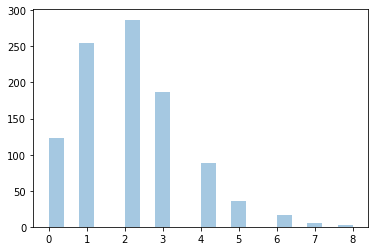

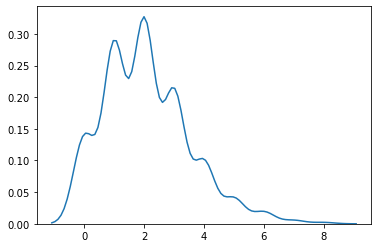

In [23]:
s = np.random.poisson(poisson_lambda, 1000)

sns.distplot(s, kde=False)
plt.show()

sns.distplot(s,  hist=False)
plt.show()


En conclusión, podemos asociar esta variable a una distribución
Poisson donde el valor esperado es de 2 accidentes por intervalo.